In [503]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [504]:
# Load datasets
static_df = pd.read_csv(r"C:\Users\anush\OneDrive\Desktop\Portfolio_analysis\data\raw\static_client_data.csv")
target_df = pd.read_csv(r"C:\Users\anush\OneDrive\Desktop\Portfolio_analysis\data\raw\target_data.csv")



In [505]:
# Merge datasets on client_id
merged_df = pd.merge(static_df, target_df, on="client_id", how="left")



In [506]:
merged_df.shape

(10000, 18)

In [507]:
merged_df.columns

Index(['client_id', 'age', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals',
       'risk_appetite', 'investment_horizon_years', 'dependents',
       'preferred_asset_classes', 'savings_rate', 'net_worth',
       'recommended_strategy', 'forecasted_value_year_1',
       'forecasted_value_year_2', 'forecasted_value_year_3'],
      dtype='object')

In [508]:
# Identify categorical and numerical columns
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)



Categorical columns: ['client_id', 'gender', 'employment_status', 'investment_goals', 'risk_appetite', 'preferred_asset_classes', 'recommended_strategy']
Numerical columns: ['age', 'annual_income', 'debt_to_income_ratio', 'financial_knowledge_score', 'investment_horizon_years', 'dependents', 'savings_rate', 'net_worth', 'forecasted_value_year_1', 'forecasted_value_year_2', 'forecasted_value_year_3']


In [509]:
# Remove clients with negative income
deleted_clients_df = merged_df[merged_df['annual_income'] < 0][['client_id']]
merged_df = merged_df[merged_df['annual_income'] >= 0]



In [510]:
merged_df.shape

(9986, 18)

In [511]:
# Convert age to categorical
def categorize_age(age):
    if age < 35:
        return 'young'
    elif age < 60:
        return 'middle_aged'
    else:
        return 'senior'
    


In [512]:
merged_df['age_category'] = merged_df['age'].apply(categorize_age)
categorical_cols.append('age_category')
merged_df.drop(columns=['age'], inplace=True)



In [513]:
merged_df.shape

(9986, 18)

In [514]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import TargetEncoder

In [515]:
merged_df.head

<bound method NDFrame.head of                                  client_id  gender employment_status  \
0     96c4c0a3-bb3f-4ac1-81ad-0850cd29911f   Other          Salaried   
1     35fb4c11-fb1a-4eeb-addc-bd6ff6cb7934    Male          Salaried   
2     e5aafbe0-c869-41d9-acf1-1b019363e449   Other          Salaried   
3     43b978dd-4dd5-4f21-96d2-63ab16c814a3   Other           Retired   
4     abe77866-df1b-4a5c-ad96-eb78dff4ffc9    Male     Self-Employed   
...                                    ...     ...               ...   
9995  f17c2deb-f3f9-492a-9de5-8e36f1614b61   Other     Self-Employed   
9996  a3ec435d-688c-4790-b960-ce10d2d06f6e    Male          Salaried   
9997  519ffef1-98fc-46bd-ba59-80f85787108a    Male          Salaried   
9998  2250d851-4753-470f-9b60-585d6f3ba747    Male          Salaried   
9999  41b1bc9d-b7ec-4092-803b-6ae2a1023605  Female        Unemployed   

      annual_income  debt_to_income_ratio  financial_knowledge_score  \
0          61244.14              

In [516]:
classification_df = merged_df.drop(
    ["forecasted_value_year_1", "forecasted_value_year_2", "forecasted_value_year_3"], 
    axis=1, errors='ignore'
)

In [517]:
classification_df

,client_id,gender,employment_status,annual_income,debt_to_income_ratio,financial_knowledge_score,investment_goals,risk_appetite,investment_horizon_years,dependents,preferred_asset_classes,savings_rate,net_worth,recommended_strategy,age_category
0,96c4c0a3-bb3f-4ac1-81ad-0850cd29911f,Other,Salaried,61244.14,0.49,5,Retirement,Medium,9,1,"['Bonds', 'Real Estate']",0.09,150946.53,Conservative,senior
1,35fb4c11-fb1a-4eeb-addc-bd6ff6cb7934,Male,Salaried,111338.35,0.39,1,Home Purchase,Low,19,3,"['Stocks', 'Bonds']",0.29,1072347.37,Conservative,middle_aged
2,e5aafbe0-c869-41d9-acf1-1b019363e449,Other,Salaried,27581.32,0.12,5,Wealth Accumulation,Medium,13,3,"['Real Estate', 'ETFs']",0.07,177370.90,Conservative,middle_aged
3,43b978dd-4dd5-4f21-96d2-63ab16c814a3,Other,Retired,64813.50,0.44,4,Retirement,Medium,3,2,"['Bonds', 'ETFs']",0.22,523811.23,Balanced,middle_aged
4,abe77866-df1b-4a5c-ad96-eb78dff4ffc9,Male,Self-Employed,108668.65,0.35,2,Education,Low,19,0,"['ETFs', 'Stocks']",0.21,938672.67,Balanced,middle_aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,f17c2deb-f3f9-492a-9de5-8e36f1614b61,Other,Self-Employed,67150.52,0.20,9,Retirement,High,12,0,"['Real Estate', 'ETFs']",0.06,258673.50,Conservative,middle_aged
9996,a3ec435d-688c-4790-b960-ce10d2d06f6e,Male,Salaried,84165.44,0.48,7,Home Purchase,Low,13,1,"['Real Estate', 'Stocks']",0.07,218772.30,Balanced,middle_aged
9997,519ffef1-98fc-46bd-ba59-80f85787108a,Male,Salaried,128000.39,0.25,4,Wealth Accumulation,High,24,3,"['Stocks', 'Bonds']",0.26,670513.62,Balanced,middle_aged
9998,2250d851-4753-470f-9b60-585d6f3ba747,Male,Salaried,118799.07,0.35,2,Home Purchase,Medium,4,1,"['Stocks', 'Bonds']",0.19,1174460.99,Balanced,young


In [518]:
classification_df.columns

Index(['client_id', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'investment_goals',
       'risk_appetite', 'investment_horizon_years', 'dependents',
       'preferred_asset_classes', 'savings_rate', 'net_worth',
       'recommended_strategy', 'age_category'],
      dtype='object')

In [519]:
classification_df=classification_df.drop(
    ["investment_goals","preferred_asset_classes"], 
    axis=1, errors='ignore'
)

In [520]:
label_cols = ['gender', 'employment_status', 'risk_appetite', 'recommended_strategy', 'age_category']

# Apply Label Encoding
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    classification_df[col] = le.fit_transform(classification_df[col])  
    label_encoders[col] = le  # Store encoders for inverse transform if needed

# Apply One-Hot Encoding for preferred_asset_classes
#classification_df = pd.get_dummies(classification_df, columns=['preferred_asset_classes'], prefix='asset_class')

# Display processed DataFrame
print(classification_df.head())

                              client_id  gender  employment_status  \
0  96c4c0a3-bb3f-4ac1-81ad-0850cd29911f       2                  1   
1  35fb4c11-fb1a-4eeb-addc-bd6ff6cb7934       1                  1   
2  e5aafbe0-c869-41d9-acf1-1b019363e449       2                  1   
3  43b978dd-4dd5-4f21-96d2-63ab16c814a3       2                  0   
4  abe77866-df1b-4a5c-ad96-eb78dff4ffc9       1                  2   

   annual_income  debt_to_income_ratio  financial_knowledge_score  \
0       61244.14                  0.49                          5   
1      111338.35                  0.39                          1   
2       27581.32                  0.12                          5   
3       64813.50                  0.44                          4   
4      108668.65                  0.35                          2   

   risk_appetite  investment_horizon_years  dependents  savings_rate  \
0              2                         9           1          0.09   
1              1    

In [521]:
classification_df.columns

Index(['client_id', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'risk_appetite',
       'investment_horizon_years', 'dependents', 'savings_rate', 'net_worth',
       'recommended_strategy', 'age_category'],
      dtype='object')

In [522]:
strategy_counts = classification_df['recommended_strategy'].value_counts()

In [523]:
strategy_counts

recommended_strategy
1    5018
2    3006
0    1962
Name: count, dtype: int64

In [524]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [525]:
classification_df.columns

Index(['client_id', 'gender', 'employment_status', 'annual_income',
       'debt_to_income_ratio', 'financial_knowledge_score', 'risk_appetite',
       'investment_horizon_years', 'dependents', 'savings_rate', 'net_worth',
       'recommended_strategy', 'age_category'],
      dtype='object')

In [526]:
classification_df=classification_df.drop(columns=['client_id'],axis=1, errors='ignore')

In [527]:
X = classification_df.drop(columns=['recommended_strategy'])  # Features
y = classification_df['recommended_strategy']  # Target

# Display class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
df_balanced = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['recommended_strategy'])], axis=1)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))



Class distribution before SMOTE: Counter({1: 5018, 2: 3006, 0: 1962})
Class distribution after SMOTE: Counter({2: 5018, 1: 5018, 0: 5018})


In [528]:
df_balanced.shape

(15054, 12)

In [529]:
df=df_balanced

In [530]:
df['adjusted_income'] = df['annual_income'] * (1 - df['debt_to_income_ratio'])
df['risk_tolerance_score'] = df['financial_knowledge_score'] * df['risk_appetite']
df['long_term_risk'] = df['investment_horizon_years'] * df['risk_appetite']
df['wealth_growth_potential'] = df['savings_rate'] * df['net_worth']
df['income_stability_score'] = df['employment_status'] * df['annual_income']
df['age_risk_factor'] = df['age_category'] * df['risk_appetite']
df['family_responsibility_score'] = df['dependents'] * df['investment_horizon_years']

In [531]:
# Save the balanced dataset (Optional)
df_balanced.to_csv("balanced_dataset.csv", index=False)

# Display first few rows of balanced dataset
print(df_balanced.head())

   gender  employment_status  annual_income  debt_to_income_ratio  \
0       2                  1       61244.14                  0.49   
1       1                  1      111338.35                  0.39   
2       2                  1       27581.32                  0.12   
3       2                  0       64813.50                  0.44   
4       1                  2      108668.65                  0.35   

   financial_knowledge_score  risk_appetite  investment_horizon_years  \
0                          5              2                         9   
1                          1              1                        19   
2                          5              2                        13   
3                          4              2                         3   
4                          2              1                        19   

   dependents  savings_rate   net_worth  age_category  recommended_strategy  \
0           1          0.09   150946.53             1              

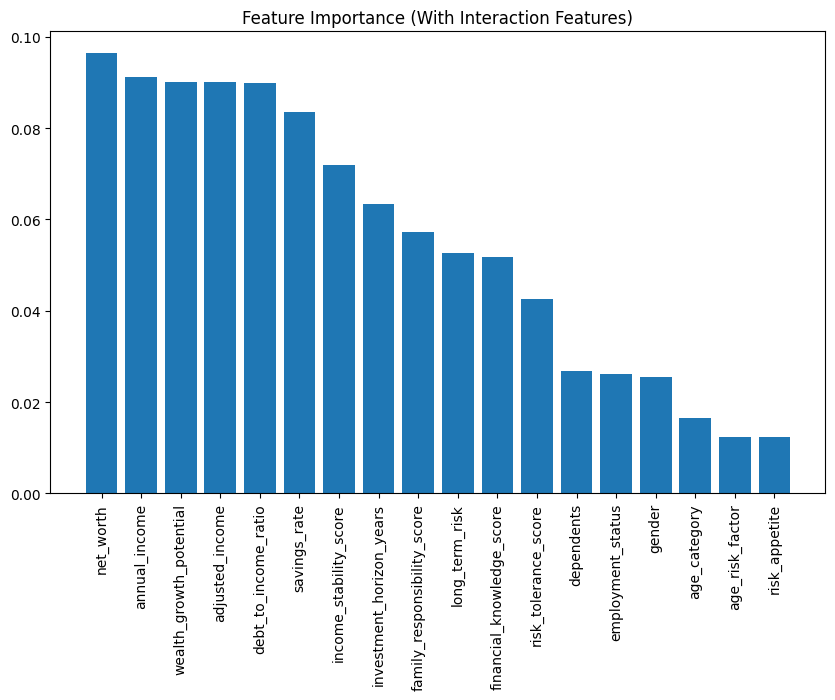

In [532]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df.drop(columns=['recommended_strategy']), df['recommended_strategy'])

# Plot Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (With Interaction Features)")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), df.drop(columns=['recommended_strategy']).columns[indices], rotation=90)
plt.show()


In [533]:
importances

array([0.02542882, 0.02607507, 0.09127738, 0.08981346, 0.05168585,
       0.01239866, 0.0633035 , 0.02676   , 0.0835623 , 0.09636428,
       0.0164532 , 0.09006269, 0.04251508, 0.0526034 , 0.09020579,
       0.07187585, 0.01241511, 0.05719957])

In [535]:
df=df.drop(columns=['risk_appetite','age_risk_factor','age_category','gender', 'employment_status','dependents','risk_tolerance_score'])

In [536]:
df

,annual_income,debt_to_income_ratio,financial_knowledge_score,investment_horizon_years,savings_rate,net_worth,recommended_strategy,adjusted_income,long_term_risk,wealth_growth_potential,income_stability_score,family_responsibility_score
0,61244.140000,0.490000,5,9,0.090000,1.509465e+05,2,31234.511400,18,13585.187700,61244.140000,9
1,111338.350000,0.390000,1,19,0.290000,1.072347e+06,2,67916.393500,19,310980.737300,111338.350000,57
2,27581.320000,0.120000,5,13,0.070000,1.773709e+05,2,24271.561600,26,12415.963000,27581.320000,39
3,64813.500000,0.440000,4,3,0.220000,5.238112e+05,1,36295.560000,6,115238.470600,0.000000,6
4,108668.650000,0.350000,2,19,0.210000,9.386727e+05,1,70634.622500,19,197121.260700,217337.300000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15049,106245.825821,0.370242,4,18,0.140000,7.385956e+05,2,66909.119178,18,103403.383421,0.000000,36
15050,92422.043507,0.273877,2,17,0.221335,7.598742e+05,2,67109.777956,34,168186.690259,0.000000,51
15051,64389.634740,0.377960,5,26,0.212880,3.589237e+05,2,40052.907578,52,76407.702519,64389.634740,0
15052,107382.726387,0.313802,1,16,0.223049,1.043035e+06,2,73685.861966,16,232647.921835,0.000000,0


In [537]:
X1 = df.drop(columns=['recommended_strategy'])  # Features
y1 = df['recommended_strategy']  # Target Variable

# Split into training and test set (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)


In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 300, 500, 700],  
#     'max_depth': [10, 20, 30, None],  
#     'min_samples_split': [2, 5, 10],  
#     'min_samples_leaf': [1, 2, 4]  
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# # Best Parameters
# print(grid_search.best_params_)

# # Train Model with Best Parameters
# rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
# rf_model.fit(X_train, y_train)


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [539]:
# Dictionary to store results
model_results = {}

# 1️⃣ Random Forest
rf_model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf_model.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_model.predict(X_test))
model_results['RandomForest'] = {'Train Accuracy': rf_train_acc, 'Test Accuracy': rf_test_acc}

# 2️⃣ XGBoost
xgb_model = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_train_acc = accuracy_score(y_train, xgb_model.predict(X_train))
xgb_test_acc = accuracy_score(y_test, xgb_model.predict(X_test))
model_results['XGBoost'] = {'Train Accuracy': xgb_train_acc, 'Test Accuracy': xgb_test_acc}

# 3️⃣ LightGBM
lgb_model = LGBMClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_train_acc = accuracy_score(y_train, lgb_model.predict(X_train))
lgb_test_acc = accuracy_score(y_test, lgb_model.predict(X_test))
model_results['LightGBM'] = {'Train Accuracy': lgb_train_acc, 'Test Accuracy': lgb_test_acc}

# 4️⃣ CatBoost
cat_model = CatBoostClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)
cat_train_acc = accuracy_score(y_train, cat_model.predict(X_train))
cat_test_acc = accuracy_score(y_test, cat_model.predict(X_test))
model_results['CatBoost'] = {'Train Accuracy': cat_train_acc, 'Test Accuracy': cat_test_acc}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001138 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1925
[LightGBM] [Info] Number of data points in the train set: 12043, number of used features: 11
[LightGBM] [Info] Start training from score -1.098446
[LightGBM] [Info] Start training from score -1.098695
[LightGBM] [Info] Start training from score -1.098695
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

In [540]:
results_df = pd.DataFrame(model_results).T
print(results_df)

              Train Accuracy  Test Accuracy
RandomForest        0.987877       0.553637
XGBoost             1.000000       0.586848
LightGBM            0.952753       0.571903
CatBoost            0.950843       0.538359


Confusion Matrix for RandomForest:


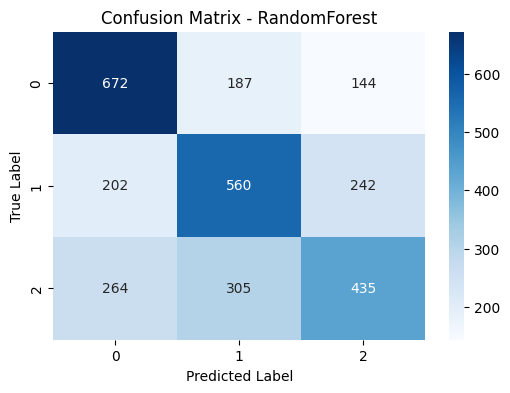

Confusion Matrix for XGBoost:


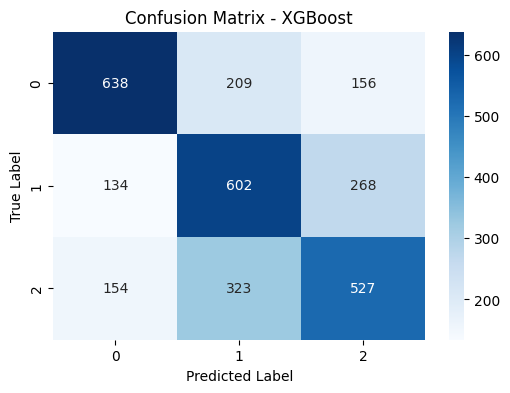

Confusion Matrix for LightGBM:


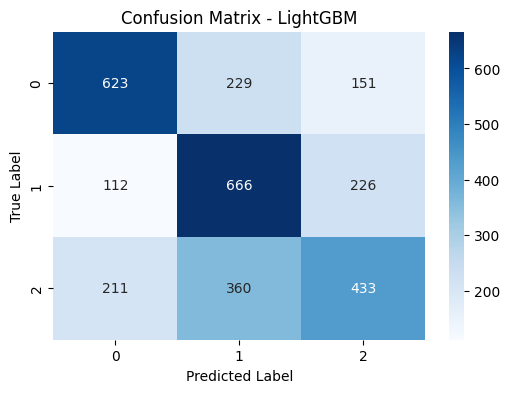

Confusion Matrix for CatBoost:


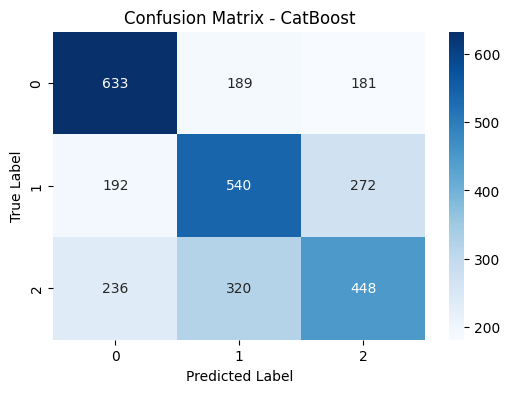

In [541]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Compute confusion matrices for all models
models = {
    "RandomForest": rf_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "CatBoost": cat_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Confusion Matrix for {model_name}:")
    plot_confusion_matrix(y_test, y_pred, model_name)


In [ ]:

# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# # Split dataset into 80% train, 20% test
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# # Initialize and train Random Forest Classifier
# clf = RandomForestClassifier(n_estimators=500, random_state=42)
# clf.fit(X_train, y_train)

# # Predict on test set
# y_pred = clf.predict(X_test)

# # Evaluate Model Performance
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.4f}")

# # Print Classification Report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Print Confusion Matrix
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


In [ ]:
# y_train

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV

# # Define parameter grid
# param_grid = {
#     'n_estimators': [500, 200, 300],  # Number of trees
#     'max_depth': [10, 20, 30, None],  # Tree depth
#     'min_samples_split': [2, 5, 10],  # Minimum samples for splitting
#     'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
#     'bootstrap': [True, False]  # Bootstrap sampling
# }

# # Initialize Random Forest
# rf = RandomForestClassifier(random_state=42)

# # Perform Randomized Search
# rf_random = RandomizedSearchCV(
#     estimator=rf, param_distributions=param_grid, 
#     n_iter=20, cv=3, verbose=2, n_jobs=-1, random_state=42
# )

# # Fit on training data
# rf_random.fit(X_train, y_train)

# # Get best parameters
# print("Best Parameters:", rf_random.best_params_)

# # Train best model
# best_rf = rf_random.best_estimator_


In [ ]:
# best_rf = RandomForestClassifier(
#     n_estimators=300, max_depth=20, min_samples_split=5, 
#     min_samples_leaf=2, bootstrap=False, class_weight='balanced', random_state=42
# )
# best_rf.fit(X_train, y_train)

# # Predict
# y_pred = best_rf.predict(X_test)

# # Evaluate
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Final Model Accuracy: {accuracy:.4f}")


In [ ]:
# train_accuracy = accuracy_score(y_train, best_rf.predict(X_train))
# print(f"Final Model Accuracy: {train_accuracy:.4f}")

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Get feature importance
# feature_importances = best_rf.feature_importances_

# # Plot top features
# indices = np.argsort(feature_importances)[::-1]
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importance")
# plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
# plt.xticks(range(len(feature_importances)), X_train.columns[indices], rotation=90)
# plt.show()


In [ ]:
y_test.shape